# Wine Quality Analysis

## Introduction

### Purpose of Analysis

The quality of wine is influenced by numerous factors ranging from the variety of grape to the chemistry during the fermentation process. This analysis explores how different chemical properties of wines, specifically in the context of the Wine Quality dataset, correlate with their sensory quality ratings. The goal is to provide insights that can assist vintners in improving their products and consumers in making informed choices.

### Data Overview

In [6]:
# Importing necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [7]:
# Filter out a specific warning
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

We will be using the Wine Quality dataset, which includes data on various chemical properties of wines and their corresponding quality ratings. This data is publicly available and commonly used for educational purposes in data science.

In [9]:
# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [10]:
# Data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [11]:
# Display variable information
print(wine_quality.variables)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

## Data Preparation

### Merging Data

To facilitate our analysis, we will merge the feature set and target variable into a single DataFrame.

In [15]:
# Combine features and target into one DataFrame
wine_data = pd.concat([X, y], axis=1)

In [16]:
print(wine_data.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Data Cleaning

We check for missing values and anomalies that could affect the analysis.

In [19]:
# Check for missing values
print(wine_data.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [20]:
# Descriptive statistics to find any anomalies
print(wine_data.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) aims to summarize the main characteristics of the dataset, often visualizing them to identify patterns and relationships between variables.

### Visualization of Key Variables

#### Alcohol Content and Quality

Alcohol content is believed to have a strong correlation with wine quality. Higher alcohol content often correlates with a perception of better quality.

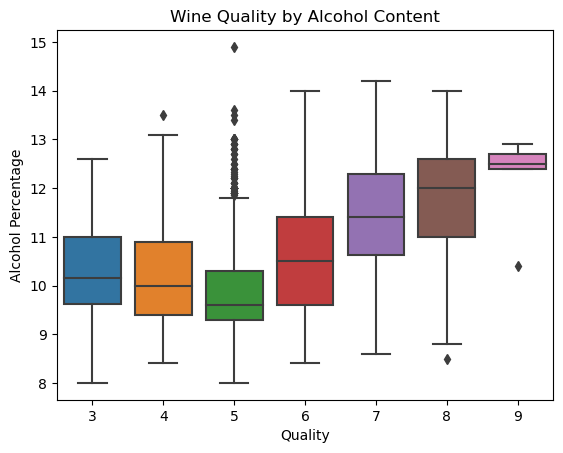

In [26]:
# Boxplot for Alcohol vs. Quality
sns.boxplot(x='quality', y='alcohol', data=wine_data)
plt.title('Wine Quality by Alcohol Content')
plt.xlabel('Quality')
plt.ylabel('Alcohol Percentage')
plt.show()

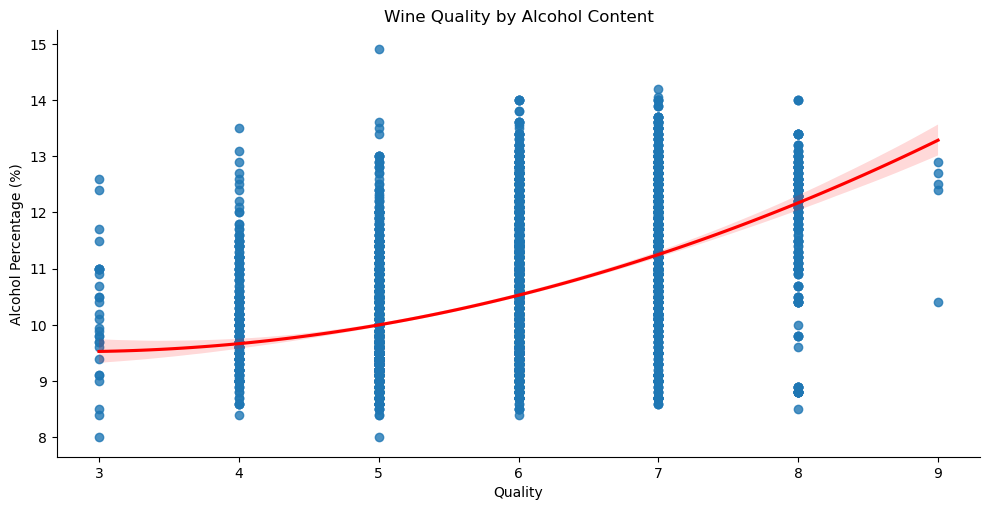

In [27]:
# Scatter plot with regression line for Alcohol vs. Quality
sns.lmplot(x='quality', y='alcohol', data=wine_data, aspect=2, height=5, order=2, line_kws={'color': 'red'})
plt.title('Wine Quality by Alcohol Content')
plt.xlabel('Quality')
plt.ylabel('Alcohol Percentage (%)')
plt.show()

#### Acidity Components and Quality

Acidity in wine is a major contributor to its taste. The balance between acidity and other elements like sweetness and bitterness is crucial.

##### Volatile Acidity

Volatile acidity, which includes acetic acid, can lead to an unpleasant taste if too high.

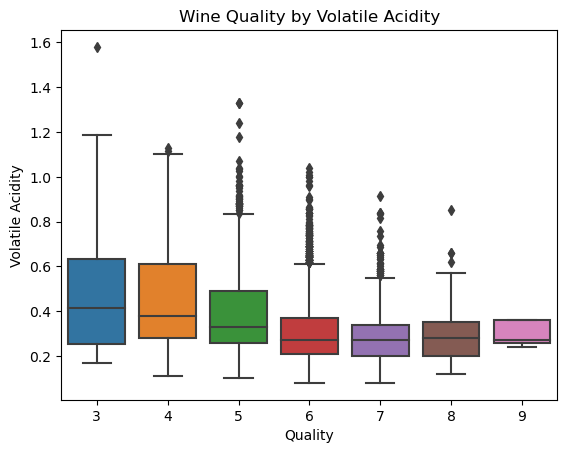

In [32]:
# Boxplot for Volatile acidity vs. Quality
sns.boxplot(x='quality', y='volatile_acidity', data=wine_data)
plt.title('Wine Quality by Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

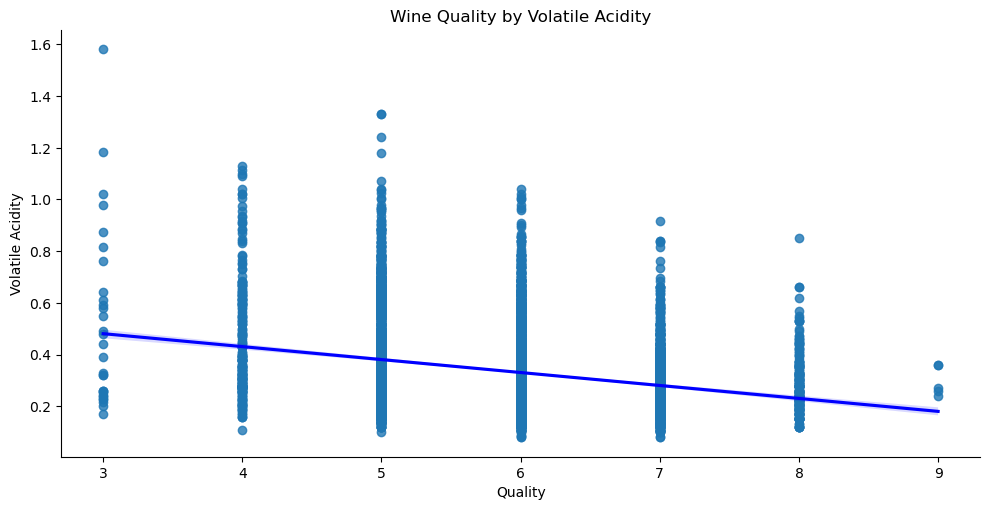

In [33]:
# Scatter plot with regression line for Volatile Acidity vs. Quality
sns.lmplot(x='quality', y='volatile_acidity', data=wine_data, aspect=2, height=5, order=1, line_kws={'color': 'blue'})
plt.title('Wine Quality by Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

##### Citric Acid

Citric acid is an important organic acid in wines, often added to wines to increase acidity, complement a specific flavor, or prevent fermentation.

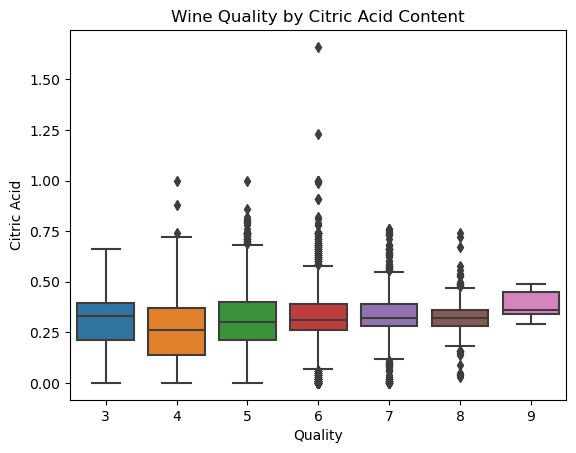

In [36]:
# Boxplot for Citric acid vs. Quality
sns.boxplot(x='quality', y='citric_acid', data=wine_data)
plt.title('Wine Quality by Citric Acid Content')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

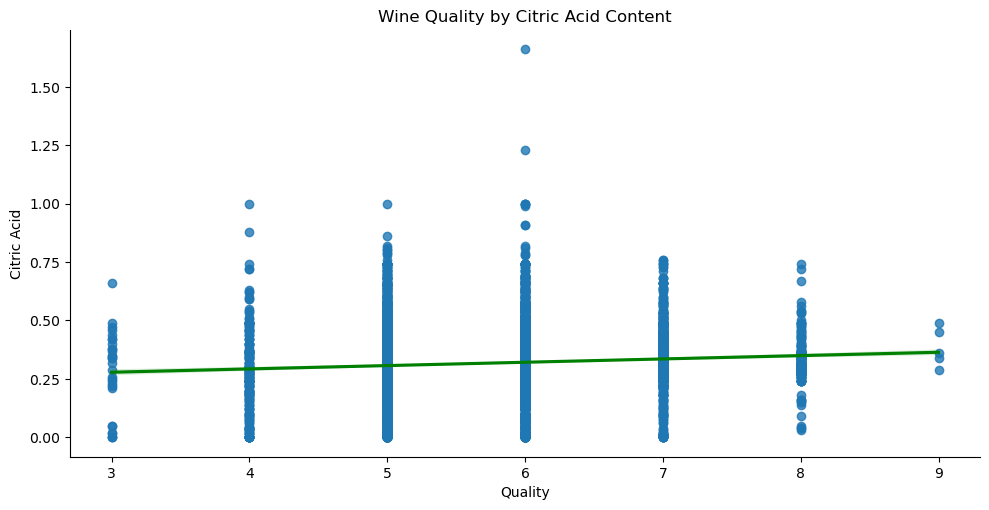

In [37]:
# Scatter plot with regression line for Citric acid vs. Quality
sns.lmplot(x='quality', y='citric_acid', data=wine_data, aspect=2, height=5, order=1, line_kws={'color': 'green'})
plt.title('Wine Quality by Citric Acid Content')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

### Correlation Analysis

To further understand the relationships among the different chemical properties of wines and how they correlate with the quality, we will examine a correlation matrix. This will help identify which variables have the most influence on wine quality and may reveal multicollinearity between explanatory variables.

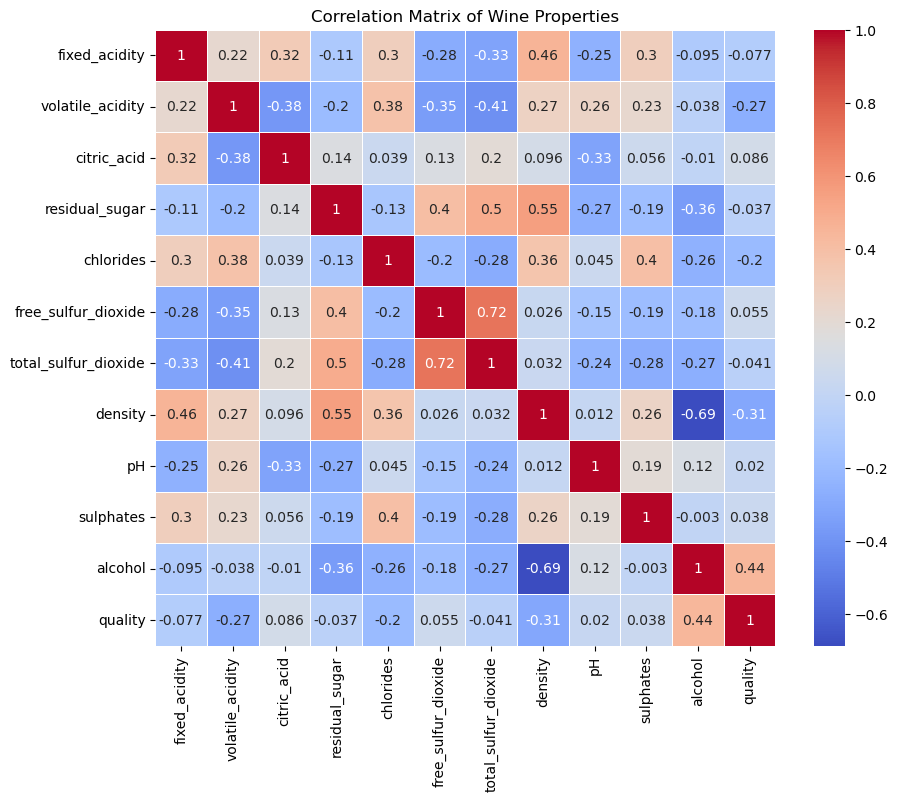

In [40]:
# Correlation matrix heatmap
correlation_matrix = wine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Wine Properties')
plt.show()

## Conclusion and Recommendations

### Summary of Findings

Our analysis revealed key insights into how different chemical properties influence wine quality. Notably, alcohol content and acidity play significant roles in the sensory quality of wine.

### Implications for Winemakers

Winemakers can use these insights to adjust their fermentation processes, perhaps by managing fermentation conditions to optimize alcohol levels and acidity.

### Suggestions for Further Research

Further statistical analysis and predictive modeling could refine these insights, potentially leading to a predictive framework that can forecast wine quality from chemical properties.